In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
cwest = pd.read_csv(r'./central_west.csv')
coldesc = pd.read_csv(r'./columns_description.csv')

In [3]:
cwest = cwest.drop(columns=['index'])

In [4]:
mapping = pd.Series(coldesc.abbreviation.values,index=cwest.columns).to_dict()

In [5]:
cwest = cwest.rename(columns=mapping)

In [6]:
cwest['DATE'] = pd.to_datetime(cwest['date'], format='%Y-%m-%d')
cwest['TIME'] = pd.to_datetime(cwest['hr'], format='%H:%M')

cwest.drop(columns=['date', 'hr'], inplace=True)

cwest['DAY'] = cwest['DATE'].dt.day
cwest['MONTH'] = cwest['DATE'].dt.month
cwest['YEAR'] = cwest['DATE'].dt.year
cwest['HOUR'] = cwest['TIME'].dt.hour
cwest['MINUTE'] = cwest['TIME'].dt.minute
cwest['SECOND'] = cwest['TIME'].dt.second

cwest.drop(columns=['DATE','TIME'], inplace=True)

cwest['mdct'] = pd.to_datetime(cwest[['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND']])

cwest.drop(columns=['DAY','MONTH','YEAR','HOUR','MINUTE','SECOND'], inplace=True)

cwest.sort_values(by='mdct', inplace=True)
cwest.reset_index(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11427120 entries, 0 to 11427119
Data columns (total 26 columns):
 #   Column  Dtype         
---  ------  -----         
 0   prcp    float64       
 1   stp     float64       
 2   smax    float64       
 3   smin    float64       
 4   gbrd    int64         
 5   temp    float64       
 6   dewp    float64       
 7   tmax    float64       
 8   tmin    float64       
 9   dmax    float64       
 10  dmin    float64       
 11  hmax    int64         
 12  hmin    int64         
 13  hmdy    int64         
 14  wdct    int64         
 15  gust    float64       
 16  wdsp    float64       
 17  reg     object        
 18  prov    object        
 19  wsnm    object        
 20  inme    object        
 21  lat     float64       
 22  lon     float64       
 23  elvt    float64       
 24  DATE    datetime64[ns]
 25  TIME    datetime64[ns]
dtypes: datetime64[ns](2), float64(15), int64(5), object(4)
memory usage: 2.2+ GB


In [9]:
cwest.drop(columns=['reg','prov','wsnm'], inplace=True)

In [10]:
cwest.head()

,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,dmax,...,hmin,hmdy,wdct,gust,wdsp,inme,lat,lon,elvt,mdct
0,0.0,899.6,900.0,899.6,3391,26.5,17.7,26.5,24.4,18.3,...,57,59,39,9.6,3.9,A047,-16.011111,-47.5575,1043.0,2017-12-20 14:00:00
1,0.0,899.2,899.6,899.2,3306,26.6,16.7,26.7,25.4,17.9,...,52,54,55,8.3,3.4,A047,-16.011111,-47.5575,1043.0,2017-12-20 15:00:00
2,0.0,898.6,899.2,898.6,3167,27.3,15.8,27.6,25.9,17.1,...,45,49,62,8.3,3.6,A047,-16.011111,-47.5575,1043.0,2017-12-20 16:00:00
3,0.0,897.7,898.6,897.7,3279,27.5,12.9,28.5,26.6,17.6,...,41,41,43,6.7,3.1,A047,-16.011111,-47.5575,1043.0,2017-12-20 17:00:00
4,0.0,897.0,897.7,897.0,2753,27.5,13.7,28.9,27.4,15.6,...,39,43,98,6.4,3.5,A047,-16.011111,-47.5575,1043.0,2017-12-20 18:00:00


In [29]:
stat = cwest.loc[cwest['inme'] == 'A047']
stat.drop(columns=['inme'], inplace=True)

C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\2906265934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat.drop(columns=['inme'], inplace=True)


In [30]:
stat.replace([-9999,-99990],0, inplace=True)
#stat.dropna(inplace=True)

C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\2966316343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat.replace([-9999,-99990],0, inplace=True)


In [37]:
date_time = stat.pop('mdct')

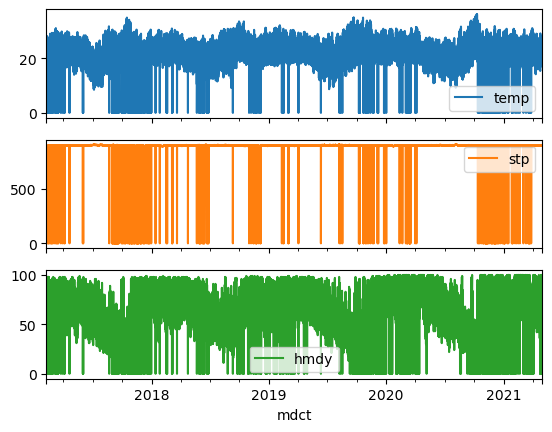

In [38]:
plot_cols = ['temp', 'stp', 'hmdy']
plot_features = stat[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots = True)

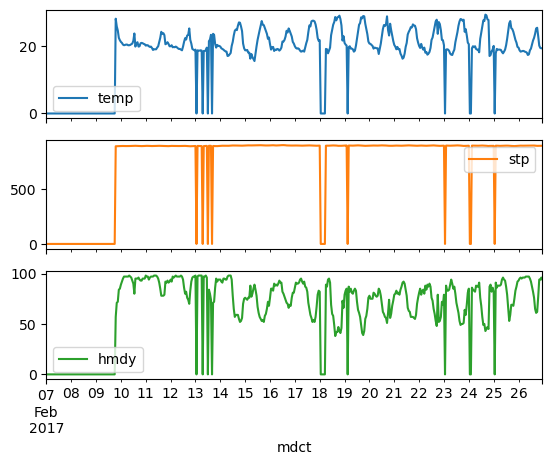

In [39]:
plot_features = stat[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots = True)

In [40]:
stat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,37056.0,4.025730e+06,3.834422e+06,0.000000,1.884822e+06,2.929568e+06,3.581510e+06,1.142712e+07
prcp,37056.0,1.776069e-01,1.591253e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.020000e+01
stp,37056.0,8.848595e+02,1.140289e+02,0.000000,8.977000e+02,8.993000e+02,9.012000e+02,9.089000e+02
smax,37056.0,8.848859e+02,1.148906e+02,0.000000,8.979000e+02,8.996000e+02,9.015000e+02,9.090000e+02
smin,37056.0,8.843967e+02,1.148278e+02,0.000000,8.974000e+02,8.991000e+02,9.010000e+02,9.087000e+02
gbrd,37056.0,8.126492e+02,1.131744e+03,0.000000,0.000000e+00,2.300000e+01,1.583000e+03,4.293000e+03
temp,37056.0,2.135024e+01,4.918978e+00,0.000000,1.890000e+01,2.090000e+01,2.450000e+01,3.630000e+01
dewp,37056.0,1.454375e+01,4.903444e+00,-7.000000,1.120000e+01,1.620000e+01,1.840000e+01,2.320000e+01
tmax,37056.0,2.210661e+01,5.118745e+00,0.000000,1.930000e+01,2.160000e+01,2.550000e+01,3.710000e+01
tmin,37056.0,2.062861e+01,4.735164e+00,0.000000,1.840000e+01,2.020000e+01,2.350000e+01,3.530000e+01


Text(0, 0.5, 'Wind Velocity [m/s]')

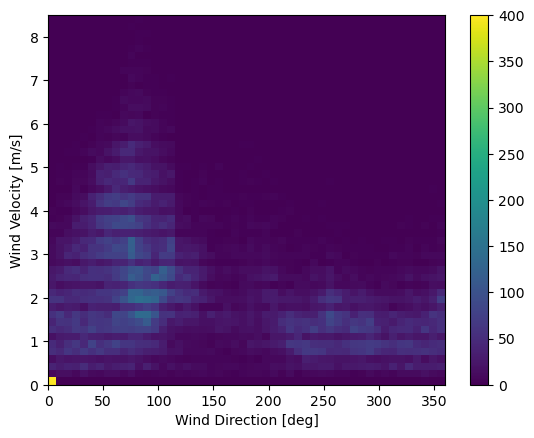

In [41]:
plt.hist2d(stat['wdct'], stat['wdsp'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [42]:
ws = stat.pop('wdsp')
wg = stat.pop('gust')

wd_rad = stat.pop('wdct') * np.pi / 180

stat['Wx'] = ws * np.cos(wd_rad)
stat['Wy'] = ws * np.sin(wd_rad)

stat['Gx'] = wg * np.cos(wd_rad)
stat['Gy'] = wg * np.sin(wd_rad)

C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\1149396243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Wx'] = ws * np.cos(wd_rad)
C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\1149396243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Wy'] = ws * np.sin(wd_rad)
C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\1149396243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

(-6.771649583831595, 5.891231062095616, -6.550804600832725, 8.479294427208506)

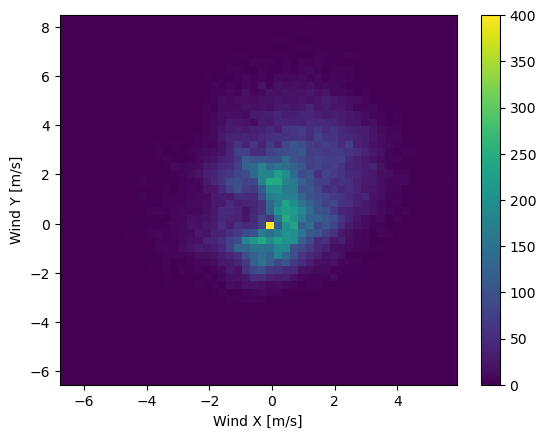

In [43]:
plt.hist2d(stat['Wx'], stat['Wy'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [44]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [45]:
day = 24*60*60
year = (365.2425)*day

stat['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
stat['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
stat['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
stat['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\3100943720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\3100943720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
C:\Users\Trent\AppData\Local\Temp\ipykernel_26256\3100943720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Text(0.5, 1.0, 'Time of day signal')

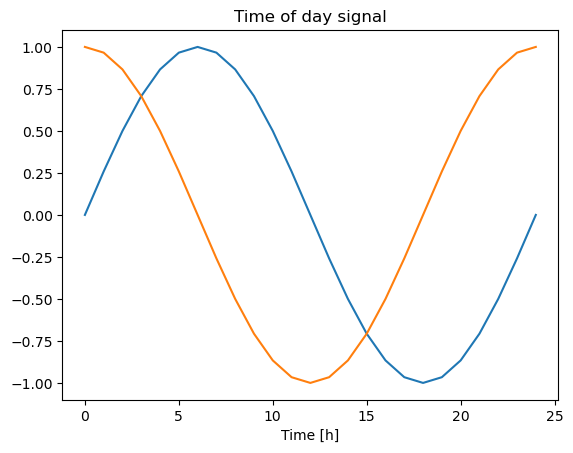

In [46]:
plt.plot(np.array(stat['Day sin'])[:25])
plt.plot(np.array(stat['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

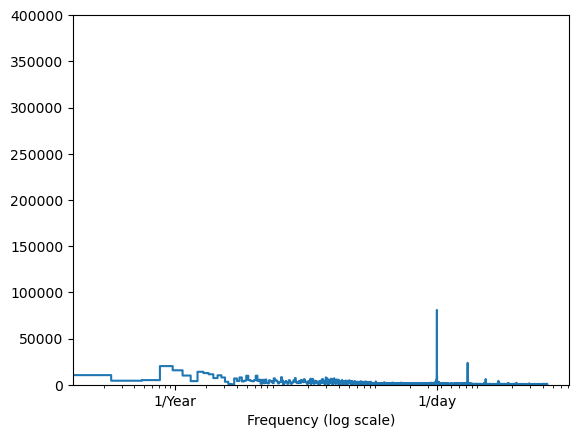

In [47]:
fft = tf.signal.rfft(stat['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(stat['temp'])
hours_per_year = 24*365.2425
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [48]:
column_indices = {name: i for i, name in enumerate(stat.columns)}

n = len(stat)
train_stat = stat[0:int(n*0.7)]
val_stat = stat[int(n*0.7):int(n*0.9)]
test_stat = stat[int(n*0.9):]

num_features = stat.shape[1]

In [49]:
train_mean = train_stat.mean()
train_std = train_stat.std()

train_stat = (train_stat - train_mean) / train_std
val_stat = (val_stat - train_mean) / train_std
test_stat = (test_stat - train_mean) / train_std

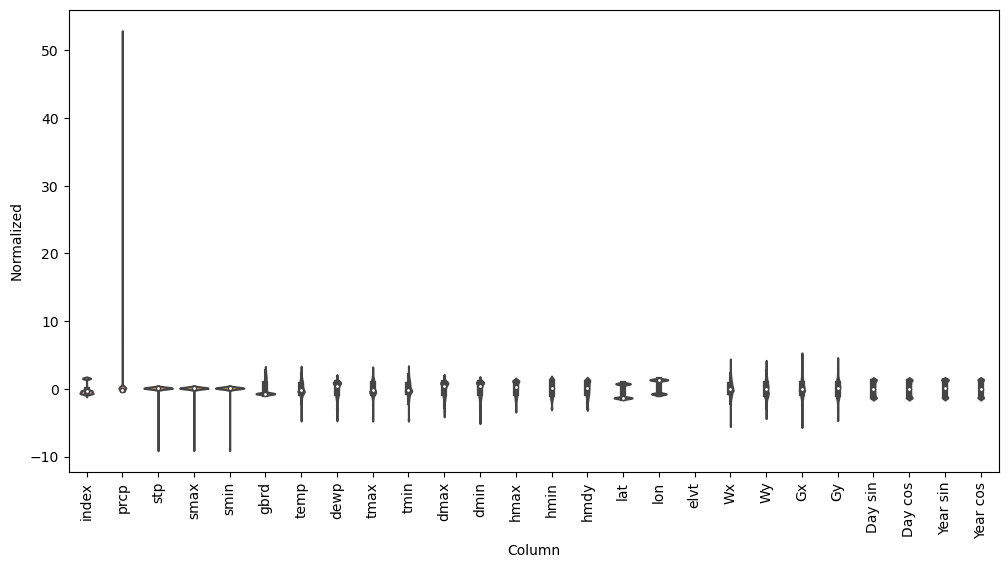

In [50]:
df_std = (stat - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(stat.keys(), rotation=90)

In [68]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df=train_stat, val_df=val_stat, test_df=test_stat,
                label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                         enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                              enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='temp', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)
        
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                       edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                           marker='X', edgecolors='k', label='Predictions',
                           c='#ff7f0e', s=64)

            if n==0:
                plt.legend()
            
        plt.xlabel('Time [h]')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32)
        
        ds = ds.map(self.split_window)
        
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result
        return result

In [54]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                    label_columns=['temp'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temp']

In [71]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                    label_columns=['temp'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['temp']

In [58]:
example_window = tf.stack([np.array(train_stat[:w2.total_window_size]),
                           np.array(train_stat[100:100+w2.total_window_size]),
                           np.array(train_stat[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 26)
Inputs shape: (3, 6, 26)
Labels shape: (3, 1, 1)


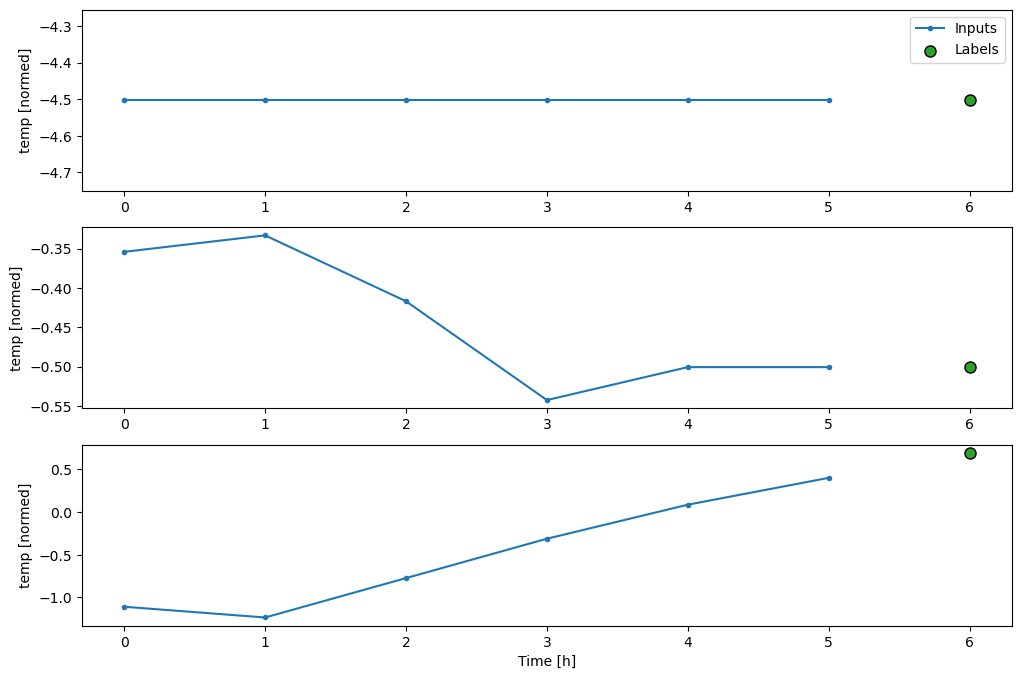

In [65]:
w2.plot()

In [72]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 26), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))